<a href="https://colab.research.google.com/github/LSowmyaDonepudi/BankruptcyRiskPrediction/blob/main/Bankruptcy_Risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import *
import sklearn.metrics
from math import sqrt
from math import pi
from math import exp

In [61]:
import os
print(os.listdir('.'))

['.config', '4year.arff', '1year.arff', '2year.arff', '3year.arff', '5year.arff', 'sample_data']


In [62]:
from scipy.io import arff
import pandas as pd

def load_arff_to_dataframe(file_name):
    with open(file_name, 'r') as f:
        data, meta = arff.loadarff(f)
        df = pd.DataFrame(data)
        return df

# Load each ARFF file into a DataFrame
year1_df = load_arff_to_dataframe('1year.arff')
year2_df = load_arff_to_dataframe('2year.arff')
year3_df = load_arff_to_dataframe('3year.arff')
year4_df = load_arff_to_dataframe('4year.arff')
year5_df = load_arff_to_dataframe('5year.arff')


In [63]:
print(year1_df.head())


      Attr1    Attr2    Attr3   Attr4    Attr5    Attr6     Attr7    Attr8  \
0  0.200550  0.37951  0.39641  2.0472  32.3510  0.38825  0.249760  1.33050   
1  0.209120  0.49988  0.47225  1.9447  14.7860  0.00000  0.258340  0.99601   
2  0.248660  0.69592  0.26713  1.5548  -1.1523  0.00000  0.309060  0.43695   
3  0.081483  0.30734  0.45879  2.4928  51.9520  0.14988  0.092704  1.86610   
4  0.187320  0.61323  0.22960  1.4063  -7.3128  0.18732  0.187320  0.63070   

    Attr9   Attr10  ...    Attr56   Attr57   Attr58    Attr59  Attr60  Attr61  \
0  1.1389  0.50494  ...  0.121960  0.39718  0.87804  0.001924  8.4160  5.1372   
1  1.6996  0.49788  ...  0.121300  0.42002  0.85300  0.000000  4.1486  3.2732   
2  1.3090  0.30408  ...  0.241140  0.81774  0.76599  0.694840  4.9909  3.9510   
3  1.0571  0.57353  ...  0.054015  0.14207  0.94598  0.000000  4.5746  3.6147   
4  1.1559  0.38677  ...  0.134850  0.48431  0.86515  0.124440  6.3985  4.3158   

    Attr62  Attr63   Attr64  class  
0   82.

In [64]:
columns=['net profit / total assets','total liabilities / total assets','working capital / total assets','current assets / short-term liabilities','[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365',' retained earnings / total assets','EBIT / total assets','book value of equity / total liabilities','sales / total assets','equity / total assets','(gross profit + extraordinary items + financial expenses) / total assets','gross profit / short-term liabilities','(gross profit + depreciation) / sales','(gross profit + interest) / total assets','(total liabilities * 365) / (gross profit + depreciation)','(gross profit + depreciation) / total liabilities','total assets / total liabilities','gross profit / total assets','gross profit / sales','(inventory * 365) / sales','sales (n) / sales (n-1)','profit on operating activities / total assets','net profit / sales','gross profit (in 3 years) / total assets','(equity - share capital) / total assets','(net profit + depreciation) / total liabilities','profit on operating activities / financial expenses','working capital / fixed assets','logarithm of total assets','(total liabilities - cash) / sales','(gross profit + interest) / sales','(current liabilities * 365) / cost of products sold','operating expenses / short-term liabilities','operating expenses / total liabilities','profit on sales / total assets','total sales / total assets','(current assets - inventories) / long-term liabilities','constant capital / total assets','profit on sales / sales','(current assets - inventory - receivables) / short-term liabilities','total liabilities / ((profit on operating activities + depreciation) * (12/365))','profit on operating activities / sales','rotation receivables + inventory turnover in days','(receivables * 365) / sales','net profit / inventory','(current assets - inventory) / short-term liabilities','(inventory * 365) / cost of products sold','EBITDA (profit on operating activities - depreciation) / total assets','EBITDA (profit on operating activities - depreciation) / sales','current assets / total liabilities','short-term liabilities / total assets','(short-term liabilities * 365) / cost of products sold)','equity / fixed assets','constant capital / fixed assets','working capital','(sales - cost of products sold) / sales','(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)','total costs /total sales','long-term liabilities / equity','sales / inventory','sales / receivables','(short-term liabilities *365) / sales','sales / short-term liabilities','sales / fixed assets','target']

In [65]:
year1_df.columns=columns
year2_df.columns=columns
year3_df.columns=columns
year4_df.columns=columns
year5_df.columns=columns

In [66]:
df = pd.concat([year1_df,year2_df,year3_df,year4_df,year5_df])
df=df.reset_index(drop=True)
#df=pd.concat([year1_df,year2_df_class1,year3_df_class1,year4_df_class1,year5_df_class1],axis=0)
#df=df.reset_index(drop=True)

# **Find Missing Values**

In [67]:
for col in df.columns:
  if col!='target':
    df.loc[df[col] == '?', col] = None

In [68]:
for i in df.columns:
  if i!='target':
    print(i,df[i].isnull().sum())

net profit / total assets 8
total liabilities / total assets 8
working capital / total assets 8
current assets / short-term liabilities 134
[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365 89
 retained earnings / total assets 8
EBIT / total assets 8
book value of equity / total liabilities 94
sales / total assets 9
equity / total assets 8
(gross profit + extraordinary items + financial expenses) / total assets 44
gross profit / short-term liabilities 134
(gross profit + depreciation) / sales 127
(gross profit + interest) / total assets 8
(total liabilities * 365) / (gross profit + depreciation) 36
(gross profit + depreciation) / total liabilities 95
total assets / total liabilities 94
gross profit / total assets 8
gross profit / sales 128
(inventory * 365) / sales 127
sales (n) / sales (n-1) 5854
profit on operating activities / total assets 8
net profit / sales 127
gross profit (in 3 years) / total assets 922
(equity -

# **Replace Missing Values**

In [69]:
obj_col=list(df.select_dtypes(['object']).columns)

In [70]:
for col in obj_col:
  df[col]=df[col].astype(float, errors = 'raise')

In [71]:
for col in df.columns:
  if df[col].isnull().sum() > 0:
    df[col]=df[col].fillna(df[col].mean())

In [72]:
for i in df.columns:
  if i!='target':
    print(i,df[i].isnull().sum())

net profit / total assets 0
total liabilities / total assets 0
working capital / total assets 0
current assets / short-term liabilities 0
[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365 0
 retained earnings / total assets 0
EBIT / total assets 0
book value of equity / total liabilities 0
sales / total assets 0
equity / total assets 0
(gross profit + extraordinary items + financial expenses) / total assets 0
gross profit / short-term liabilities 0
(gross profit + depreciation) / sales 0
(gross profit + interest) / total assets 0
(total liabilities * 365) / (gross profit + depreciation) 0
(gross profit + depreciation) / total liabilities 0
total assets / total liabilities 0
gross profit / total assets 0
gross profit / sales 0
(inventory * 365) / sales 0
sales (n) / sales (n-1) 0
profit on operating activities / total assets 0
net profit / sales 0
gross profit (in 3 years) / total assets 0
(equity - share capital) / total

# **Replacing Outliers**

In [73]:
out_l=[]
for col in columns:
  if (col!=' target ') & (col!='id'):
    mean = df[col].mean()
    std = df[col].std()
    out_l.append([col,df.loc[(df[col] - mean).abs() > 2*std].count()])

In [74]:
out_l

[['net profit / total assets',
  net profit / total assets                                                                                              30
  total liabilities / total assets                                                                                       30
  working capital / total assets                                                                                         30
  current assets / short-term liabilities                                                                                30
  [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365    30
                                                                                                                         ..
  sales / receivables                                                                                                    30
  (short-term liabilities *365) / sales                                                              

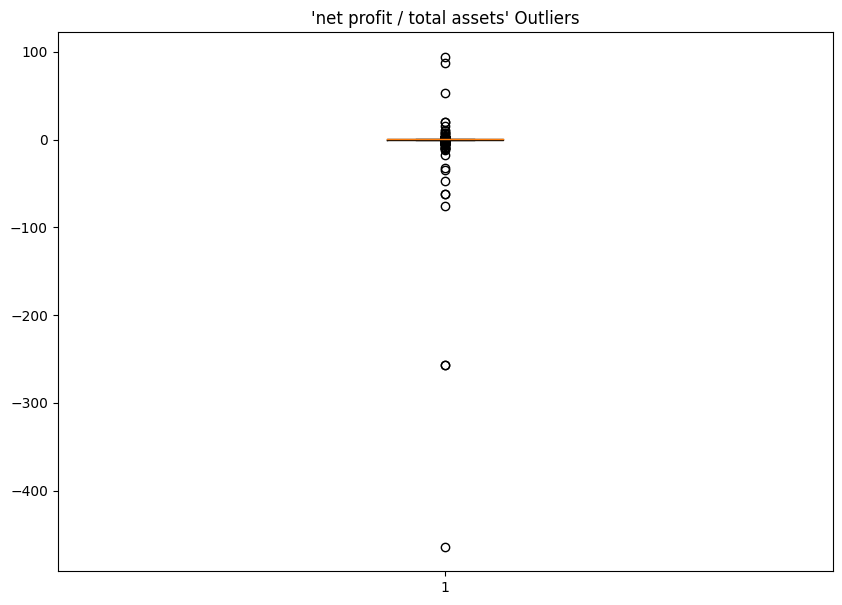

In [75]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df['net profit / total assets'])
plt.title("'net profit / total assets' Outliers")
plt.show()

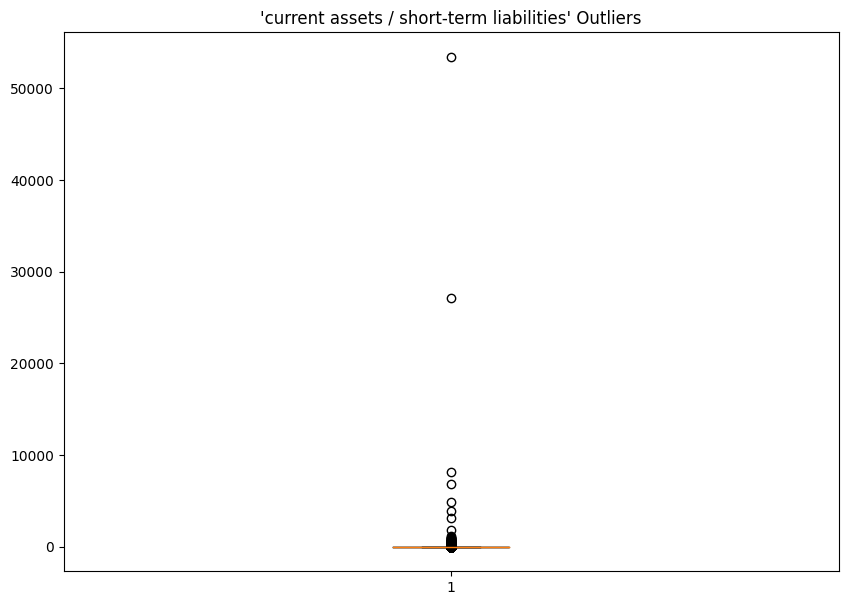

In [76]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df['current assets / short-term liabilities'])
plt.title("'current assets / short-term liabilities' Outliers")
plt.show()

In [77]:
for col in df.columns:
  if col!='target':
    mean = df[col].mean()
    std = df[col].std()
    df.loc[(df[col] - mean).abs() > 2*std, col] = mean


# **Exploratory Data Analysis- EDA**

<Axes: xlabel='(gross profit + depreciation) / total liabilities', ylabel='operating expenses / total liabilities'>

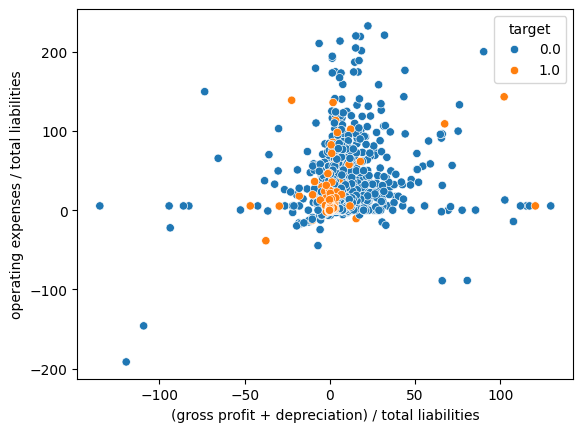

In [78]:
sns.scatterplot(data= df, x='(gross profit + depreciation) / total liabilities', y='operating expenses / total liabilities', hue = 'target')

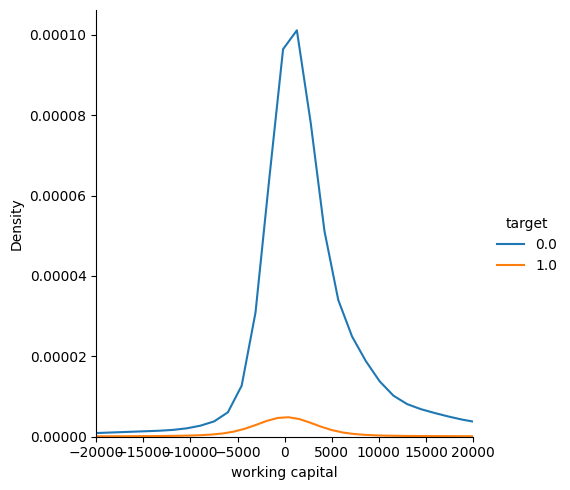

In [79]:
sns.displot(df, x='working capital', kind='kde', hue='target')
plt.xlim(-20000,20000)
plt.show()

# **Finding Correlation**

In [80]:
X_df=df.drop(columns=['target'],axis=1)
y_df=df['target']

In [81]:
X_df.corr()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets
net profit / total assets,1.000000,-0.350874,0.342286,0.028306,0.022181,0.291430,0.784935,0.031062,0.029438,0.302970,...,0.102185,0.010366,0.166451,-0.040068,-0.004428,0.015370,0.010546,-0.044103,0.200851,0.019792
total liabilities / total assets,-0.350874,1.000000,-0.773710,-0.134466,-0.047604,-0.550924,-0.331109,-0.151820,0.123091,-0.716131,...,-0.211798,-0.010273,0.014850,0.016165,0.020818,0.002902,0.033080,0.054618,-0.260542,0.051688
working capital / total assets,0.342286,-0.773710,1.000000,0.188905,0.066277,0.414301,0.306603,0.125840,-0.064310,0.567700,...,0.252067,0.006164,0.012359,-0.012213,-0.017794,-0.000660,-0.080183,-0.068328,0.291123,0.053670
current assets / short-term liabilities,0.028306,-0.134466,0.188905,1.000000,0.021578,-0.003672,0.022327,0.551988,-0.038799,0.100274,...,0.044041,-0.003682,-0.018397,0.008701,-0.041831,0.019020,0.005195,-0.002309,0.356834,0.006367
[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,0.022181,-0.047604,0.066277,0.021578,1.000000,0.021703,0.017723,0.053171,0.009335,0.063376,...,0.036536,0.001508,-0.000339,-0.005654,0.005174,0.002306,-0.010408,-0.036376,0.032258,0.012831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sales / inventory,0.015370,0.002902,-0.000660,0.019020,0.002306,-0.025174,0.015751,0.019907,0.032547,-0.006136,...,-0.010562,-0.000342,0.006520,0.003511,-0.003058,1.000000,0.013542,0.005498,0.044563,0.018144
sales / receivables,0.010546,0.033080,-0.080183,0.005195,-0.010408,-0.058250,-0.008337,0.012024,0.157406,-0.043569,...,-0.043074,0.004515,0.013504,-0.006170,-0.004426,0.013542,1.000000,-0.011573,0.135612,0.003073
(short-term liabilities *365) / sales,-0.044103,0.054618,-0.068328,-0.002309,-0.036376,-0.047642,-0.035963,0.002869,-0.032680,-0.067377,...,-0.024392,-0.405058,-0.007983,0.204094,-0.004870,0.005498,-0.011573,1.000000,-0.031991,-0.004216
sales / short-term liabilities,0.200851,-0.260542,0.291123,0.356834,0.032258,0.064141,0.165781,0.289861,0.171273,0.195234,...,0.050684,0.008148,0.025129,-0.010597,-0.024114,0.044563,0.135612,-0.031991,1.000000,0.030040


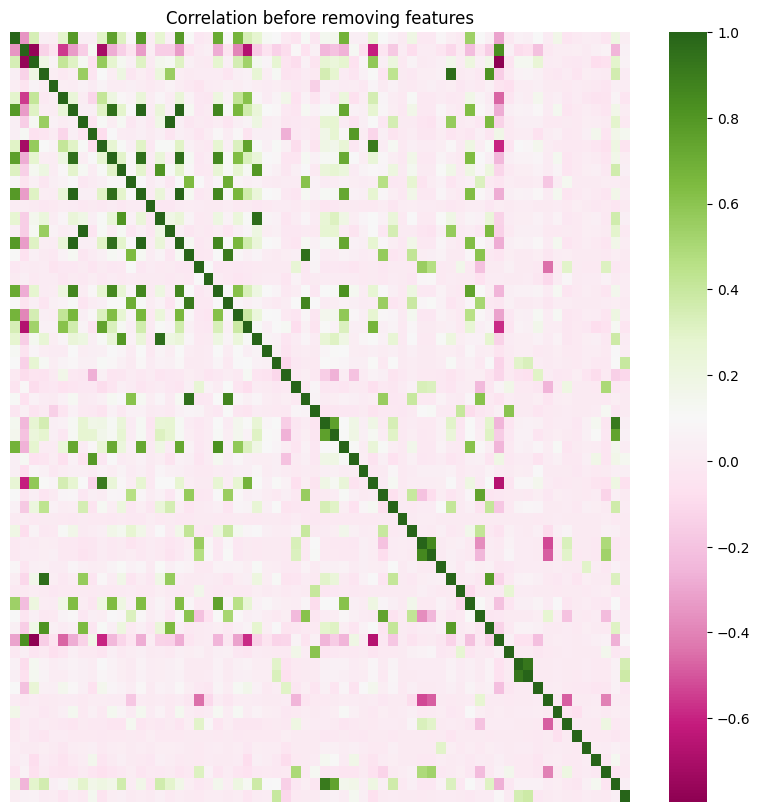

In [82]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(X_df.corr(), cmap="PiYG", annot=False, xticklabels=False, yticklabels=False)
ax.set_title('Correlation before removing features')
plt.show()

In [83]:
cor_matrix = X_df.corr().abs()

In [84]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))

In [85]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
print(to_drop)

['working capital / total assets', 'EBIT / total assets', '(gross profit + extraordinary items + financial expenses) / total assets', '(gross profit + interest) / total assets', '(gross profit + depreciation) / total liabilities', 'total assets / total liabilities', 'gross profit / total assets', 'profit on operating activities / total assets', 'net profit / sales', '(net profit + depreciation) / total liabilities', '(gross profit + interest) / sales', 'operating expenses / total liabilities', 'profit on sales / total assets', 'total sales / total assets', 'constant capital / total assets', '(receivables * 365) / sales', '(current assets - inventory) / short-term liabilities', 'current assets / total liabilities', 'short-term liabilities / total assets', 'constant capital / fixed assets', 'sales / short-term liabilities']


In [86]:
len(to_drop)

21

In [87]:
X_df=X_df.drop(columns=to_drop,axis=1)

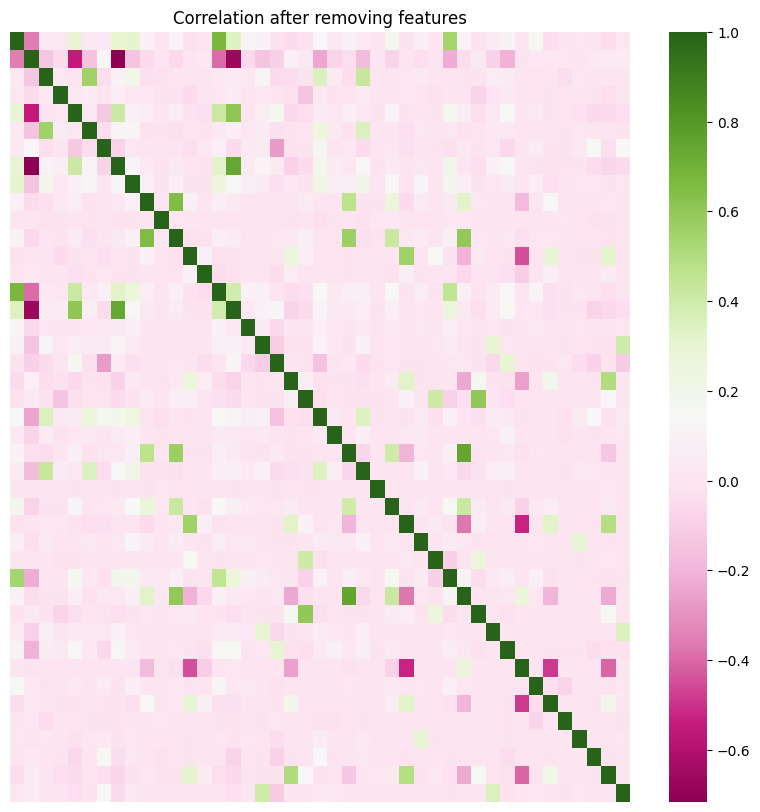

In [88]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(X_df.corr(), cmap="PiYG", annot=False, xticklabels=False, yticklabels=False)
ax.set_title('Correlation after removing features')
plt.show()

In [89]:
X_df

,net profit / total assets,total liabilities / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,gross profit / short-term liabilities,(gross profit + depreciation) / sales,...,equity / fixed assets,working capital,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / fixed assets
0,0.200550,0.37951,2.04720,32.3510,0.38825,1.33050,1.13890,0.504940,0.659800,0.166600,...,2.24370,7672.187571,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,7.42770
1,0.209120,0.49988,1.94470,14.7860,0.00000,0.99601,1.69960,0.497880,0.516800,0.158350,...,17.86600,2304.600000,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,60.98700
2,0.248660,0.69592,1.55480,-1.1523,0.00000,0.43695,1.30900,0.304080,0.641840,0.244350,...,1.20980,6332.700000,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,5.20780
3,0.081483,0.30734,2.49280,51.9520,0.14988,1.86610,1.05710,0.573530,0.301630,0.094257,...,2.45240,20545.000000,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,5.54970
4,0.187320,0.61323,1.40630,-7.3128,0.18732,0.63070,1.15590,0.386770,0.331470,0.121820,...,1.88390,3186.600000,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,7.89800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,0.012898,0.70621,1.17220,-18.9070,0.00000,0.41600,1.67680,0.293790,0.061959,0.023622,...,0.39944,3599.100000,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,2.27990
43401,-0.578050,0.96702,0.16576,-67.3650,-0.57805,-0.40334,0.93979,-0.390040,-0.602160,-0.110220,...,-0.46385,-9242.100000,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,5.13050
43402,-0.179050,1.25530,0.74554,-120.4400,-0.17905,-0.26018,1.17490,-0.326590,-0.142840,-0.072940,...,-1.70670,-58253.000000,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,9.95270
43403,-0.108860,0.74394,1.08780,-17.0030,-0.10886,0.12531,0.84516,0.093224,-0.620380,-0.065652,...,0.11530,1107.500000,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,0.95575


# **Model Training**

Logistic Regression - Without Smote

In [90]:
class LogisticRegression:


  def __init__(self, X, y, learningRate, tolerance, lamda, maxIteration):
    self.X=X
    self.y=y
    self.learningRate = learningRate
    self.tolerance = tolerance
    self.lamda = lamda
    self.maxIteration = maxIteration


  def add_X0(self, X):
    return np.column_stack([np.ones([X.shape[0],1]), X])


  def sigmoid(self,z):
    sig = 1 / (1 + math.e**(-z))
    return sig



  def costFunction(self, X, y):

    pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w).dot(y)
    cost = pred_.sum()
    return cost



  def gradient(self, X, y):
    sig = self.sigmoid(X.dot(self.w))

    grad = (sig - y).dot(X)
    return grad



  def gradientDescent(self, X, y):
    errors = []
    last = float('inf')

    for i in tqdm(range(self.maxIteration)):
      self.w = self.w - self.learningRate * (self.gradient(X, y) + (self.lamda * self.w))
      curr = self.costFunction(X, y)

      diff = last - curr
      last = curr

      errors.append(curr)
      if diff < self.tolerance:
        print('Model stopped')
        break



    self.plot_cost(errors)

  def predict(self, X):
    sig = self.sigmoid(X.dot(self.w))
    return np.around(sig)



  def evaluate(self, y, y_hat):
    y = (y == 1)
    y_hat = (y_hat == 1)

    precision = (y & y_hat).sum() / y_hat.sum()

    recall = (y & y_hat).sum() / y.sum()

    f1score = 2 * (precision * recall) / (precision + recall)

    return f1score, recall, precision



  def run_model(self):
     self.X_train = self.X
     self.y_train = self.y
     self.X_train = self.add_X0(self.X_train)
     #oversample = SMOTE(sampling_strategy=0.5, k_neighbors=2)
     #self.X_train, self.y_train = oversample.fit_resample(self.X_train, self.y_train)
     self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0
     self.gradientDescent(self.X_train, self.y_train)

     print(self.w)
     y_hat_train = self.predict(self.X_train)
     f1score, recall, precision = self.evaluate(self.y_train, y_hat_train)

     print("Accuracy:", accuracy_score(self.y_train, y_hat_train))
     print("F1 score:", f1score)
     print("Precision:", precision)
     print("Recall:", recall)



  def plot(self):
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1],
                     self.sigmoid(self.X_train.dot(self.w)),
                     c = self.y_train[:], cmap='viridis', s=100);

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15, )
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)



  def plot_cost(self, cost_sequence):
        # Data for plotting
        s = np.array(cost_sequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t, s)

        ax.set(xlabel='iterations', ylabel='cost',
               title='cost trend')
        ax.grid()

        plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
        plt.show()


In [91]:
train_X = X_df.values
train_y = y_df.values
lr = LogisticRegression(train_X, train_y, learningRate=0.01,tolerance=0.0000000005,lamda=0.001,maxIteration=5000)

  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-90-f7374302162e>:25: RuntimeWarning: overflow encountered in exp
  pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w).dot(y)
<ipython-input-90-f7374302162e>:47: RuntimeWarning: invalid value encountered in scalar subtract
  diff = last - curr
<ipython-input-90-f7374302162e>:18: RuntimeWarning: overflow encountered in power
  sig = 1 / (1 + math.e**(-z))
100%|██████████| 5000/5000 [00:55<00:00, 89.67it/s] 


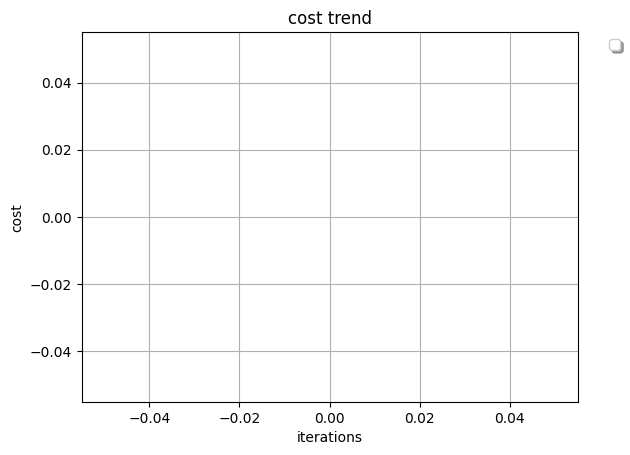

[-2.07729807e+05 -6.05929062e+03 -1.37215313e+05 -1.94896474e+05
  7.19064450e+03 -6.41835191e+03 -1.46240365e+05 -2.58208220e+05
 -6.19838164e+04 -5.13114921e+04 -1.97192128e+04  6.43684954e+04
 -5.25079651e+03 -6.47609700e+06 -2.53031639e+05 -2.33753664e+04
 -5.59301539e+04  1.59405031e+04  1.26140792e+05 -9.45248606e+05
  4.16949185e+04 -1.41931014e+06 -8.80722113e+05 -8.36278409e+06
 -1.73046373e+04 -7.44339663e+04 -1.88058651e+05 -1.00454535e+04
 -1.58142806e+06  2.25769296e+05 -5.82388459e+06 -6.77579020e+01
 -5.08079039e+03 -4.40811410e+04  1.38310535e+05 -7.25021521e+05
 -3.83462818e+05 -2.48338431e+04 -2.21089916e+05 -1.36630361e+05
 -9.48479710e+05 -2.23963800e+06 -2.32268537e+04 -5.35336358e+05]
Accuracy: 0.8640479207464578
F1 score: 0.13360739979445013
Precision: 0.09639830508474577
Recall: 0.21759923481587756


In [92]:
lr.run_model()

Logistic Regression- With SMOTE

In [93]:
class LogisticRegression:


  def __init__(self, X, y, learningRate, tolerance, lamda, maxIteration):
    self.X=X
    self.y=y
    self.learningRate = learningRate
    self.tolerance = tolerance
    self.lamda = lamda
    self.maxIteration = maxIteration


  def add_X0(self, X):
    return np.column_stack([np.ones([X.shape[0],1]), X])


  def sigmoid(self,z):
    sig = 1 / (1 + math.e**(-z))
    return sig



  def costFunction(self, X, y):

    pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w).dot(y)
    cost = pred_.sum()
    return cost



  def gradient(self, X, y):
    sig = self.sigmoid(X.dot(self.w))

    grad = (sig - y).dot(X)
    return grad



  def gradientDescent(self, X, y):
    errors = []
    last = float('inf')

    for i in tqdm(range(self.maxIteration)):
      self.w = self.w - self.learningRate * (self.gradient(X, y) + (self.lamda * self.w))
      curr = self.costFunction(X, y)

      diff = last - curr
      last = curr

      errors.append(curr)
      if diff < self.tolerance:
        print('Model stopped')
        break



    self.plot_cost(errors)

  def predict(self, X):
    sig = self.sigmoid(X.dot(self.w))
    return np.around(sig)



  def evaluate(self, y, y_hat):
    y = (y == 1)
    y_hat = (y_hat == 1)

    precision = (y & y_hat).sum() / y_hat.sum()

    recall = (y & y_hat).sum() / y.sum()

    f1score = 2 * (precision * recall) / (precision + recall)

    return f1score, recall, precision



  def run_model(self):
     self.X_train = self.X
     self.y_train = self.y
     self.X_train = self.add_X0(self.X_train)
     oversample = SMOTE(sampling_strategy=0.5, k_neighbors=2)
     self.X_train, self.y_train = oversample.fit_resample(self.X_train, self.y_train)
     self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0
     self.gradientDescent(self.X_train, self.y_train)

     print(self.w)
     y_hat_train = self.predict(self.X_train)
     f1score, recall, precision = self.evaluate(self.y_train, y_hat_train)

     print("Accuracy:", accuracy_score(self.y_train, y_hat_train))
     print("F1 score:", f1score)
     print("Precision:", precision)
     print("Recall:", recall)



  def plot(self):
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1],
                     self.sigmoid(self.X_train.dot(self.w)),
                     c = self.y_train[:], cmap='viridis', s=100);

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15, )
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)



  def plot_cost(self, cost_sequence):
        # Data for plotting
        s = np.array(cost_sequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t, s)

        ax.set(xlabel='iterations', ylabel='cost',
               title='cost trend')
        ax.grid()

        plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
        plt.show()


In [94]:
train_X = X_df.values
train_y = y_df.values

In [95]:
lr = LogisticRegression(train_X, train_y, learningRate=0.01,tolerance=0.0000000005,lamda=0.001,maxIteration=5000)

  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-93-60527e3f008a>:25: RuntimeWarning: overflow encountered in exp
  pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w).dot(y)
<ipython-input-93-60527e3f008a>:47: RuntimeWarning: invalid value encountered in scalar subtract
  diff = last - curr
<ipython-input-93-60527e3f008a>:18: RuntimeWarning: overflow encountered in power
  sig = 1 / (1 + math.e**(-z))
100%|██████████| 5000/5000 [01:38<00:00, 50.60it/s]


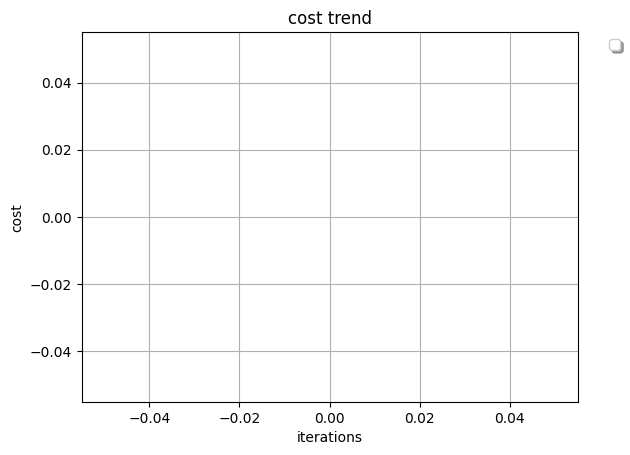

[ -131627.95564867   -41479.84349308   -45419.57258192   595030.44392412
    22664.22450303   -59430.39334633   731990.47726734   -66717.22852932
   -77397.01060335  -195561.08421553   -49856.62444342  -501143.49201896
   -40098.2762797   -600779.93999692    82925.31305126   -83590.81769426
  -119597.00357439    49017.34987257   372312.85553737  -620287.65595505
    78071.79921058    10008.18956153   -46191.74935303 -2939736.55975024
   -53628.82835556    87757.70126932  -589625.66113976   -33184.83229267
   -26342.60077686   666530.92169103   -23906.01708895   -21895.46027264
   -21063.45576872  -177263.59371275   196159.96945169  -500469.38872324
 -1086018.92088907   -90633.51909049  -607676.68875296   -12595.1142097
   -38403.22889363  -846545.96125372    -5385.84829899   299066.40055507]
Accuracy: 0.6940665795291346
F1 score: 0.4488822999331415
Precision: 0.5617724097788126
Recall: 0.3737716028464927


In [96]:
lr.run_model()

In [97]:
lr = LogisticRegression(train_X, train_y, learningRate=0.00001,tolerance=0.00005,lamda=5,maxIteration=5000)

  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-93-60527e3f008a>:25: RuntimeWarning: overflow encountered in exp
  pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w).dot(y)
<ipython-input-93-60527e3f008a>:47: RuntimeWarning: invalid value encountered in scalar subtract
  diff = last - curr
<ipython-input-93-60527e3f008a>:18: RuntimeWarning: overflow encountered in power
  sig = 1 / (1 + math.e**(-z))
100%|██████████| 5000/5000 [01:40<00:00, 49.68it/s]


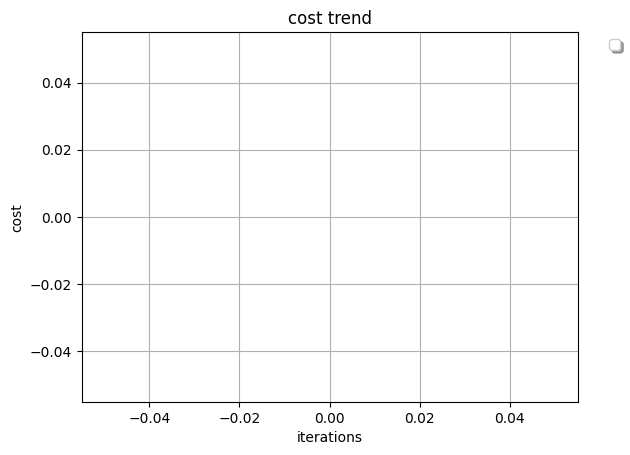

[-1.06851361e+02 -3.12489373e+01 -3.89772525e+01  4.15111083e+02
  2.55195211e+01 -4.57457503e+01  5.81092900e+02 -7.00409818e+01
 -5.97166535e+01 -1.08284944e+02 -3.59520716e+01 -7.55264145e+02
 -2.80771436e+01 -3.01714929e+02  8.78353307e+01 -6.21444204e+01
 -9.07381726e+01  1.83003188e+01  3.59372260e+02 -5.09367905e+02
  1.50645782e+02  6.57428275e+00 -7.18449648e+01 -2.08997505e+03
 -4.27390920e+01  5.29060632e+01 -4.70260212e+02 -2.30027621e+01
 -1.10566626e+01  2.22714532e+02 -5.09751804e+01 -1.10780342e+01
 -1.02104564e+01 -1.05097720e+02  2.75042741e+02  4.11519258e+02
 -7.97336879e+02 -7.14260014e+01 -5.52397119e+02 -1.77167518e+00
  7.82475829e-01 -8.43414759e+02  3.05841281e+01  1.27418595e+02]
Accuracy: 0.4848235464975553
F1 score: 0.36068725219271897
Precision: 0.30757146272326763
Recall: 0.43597811879750203


In [98]:
lr.run_model()

In [99]:
lr = LogisticRegression(train_X, train_y, learningRate=0.1,tolerance=0.0000000005,lamda=0.001,maxIteration=5000)

  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-93-60527e3f008a>:25: RuntimeWarning: overflow encountered in exp
  pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w).dot(y)
<ipython-input-93-60527e3f008a>:47: RuntimeWarning: invalid value encountered in scalar subtract
  diff = last - curr
<ipython-input-93-60527e3f008a>:18: RuntimeWarning: overflow encountered in power
  sig = 1 / (1 + math.e**(-z))
100%|██████████| 5000/5000 [01:40<00:00, 49.95it/s]


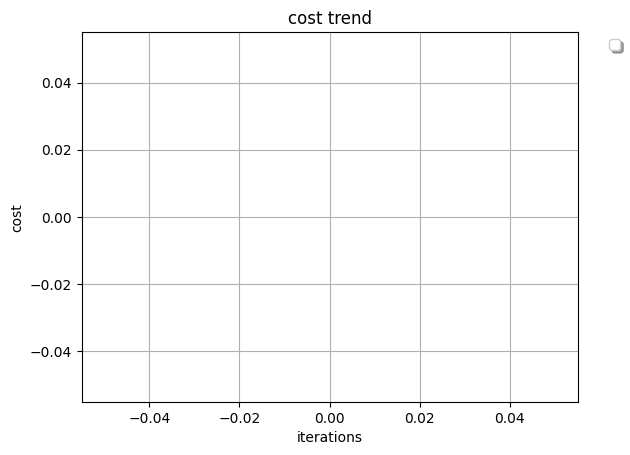

[-9.23322959e+05 -3.07286371e+05 -3.04407858e+05  3.68846760e+06
  2.81492968e+05 -4.43440388e+05  4.95014947e+06 -6.07435406e+05
 -5.51201041e+05 -1.29010325e+06 -3.26481925e+05 -6.95321338e+06
 -2.83092872e+05 -1.43643327e+06  1.05190548e+06 -6.19061732e+05
 -8.85590556e+05  1.81892082e+05  3.48109559e+06 -4.40703768e+06
  8.55593444e+05 -8.56598401e+03  1.86988429e+04 -2.13524678e+07
 -4.12196651e+05  8.70086995e+05 -4.36822132e+06 -2.35165863e+05
 -4.86830167e+04  4.00394063e+06 -1.04264264e+05 -1.86827246e+05
 -1.43468840e+05 -1.26397796e+06  2.30387031e+06  3.67332455e+06
 -5.77289069e+06 -6.46625795e+05 -4.52410066e+06 -1.27617085e+05
 -1.98772358e+05 -7.09335273e+06  1.24970072e+05  1.22517264e+06]
Accuracy: 0.4860176534185345
F1 score: 0.35699289405684753
Precision: 0.3061740364971086
Recall: 0.4280389214309919


In [100]:
lr.run_model()

**Naive Bayes**

In [101]:
mean = np.mean(X_df.values)
std = np.std(X_df.values)
X_norm = (X_df.values-mean) / std

Without SMOTE

In [102]:
class NaiveBayes:

  def __init__(self, X, y) -> None:
    self.X = X
    self.y = y
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size= 0.3, random_state=0)
    #over = SMOTE(sampling_strategy=0.5, k_neighbors=2)
    #under = RandomUnderSampler(sampling_strategy=0.8)
    #steps = [('o', over), ('u', under)]
    #pipeline = Pipeline(steps=steps)
    #self.X_train, self.y_train = over.fit_resample(self.X_train, self.y_train)

  #def fit_distribution(self,data):
   # mean_arr = list(np.mean(data, axis=0))
    #sigma_arr = list(np.std(data, axis=0))
    #dist = []
    #for n in range(data.shape[1]):
     # dist.append(norm(loc=mean_arr[n],scale=sigma_arr[n]))
    #len(dist)
    #return dist


  def fit_distribution(self,data):
    mean = np.mean(data)
    sigma = np.std(data)

    dist = norm(mean, sigma)
    return dist

  def x_mean(self,data):
    mean = np.mean(data)
    return mean

  def x_sigma(self,data):
    sigma = np.std(data)
    return sigma

  def calculate_likelihood(self,x,mean,sigma):
    lkhd = 1
    for n in range(len(mean)):
      exponent = exp(-((x[n]-mean[n])**2 / (2 * sigma[n]**2 )))
      c = (1 / (sqrt(2 * pi) * sigma[n])) * exponent
      lkhd = lkhd * c
    return lkhd

  def probability(self, X, prior, mean, sigma):
    return prior * self.calculate_likelihood(X,mean,sigma)

  #def probability(self, X, prior, dist):
   # curr = 1
    #for i in range(len(dist)):
    #  curr = curr * dist[i].pdf(X[i])
    #return prior * curr

  def fit(self):

    self.X0_train = self.X_train[self.y_train == 0]
    self.X1_train = self.X_train[self.y_train == 1]

    self.prior_y0 = len(self.X0_train) / len(self.X_train)
    #print(self.prior_y0)
    self.prior_y1 = len(self.X1_train) / len(self.X_train)
    #print(self.prior_y1)

   # self.X0_dist = []
   # self.X1_dist = []
   # for i in range(self.X0_train.shape[1]):
   #    self.X0_dist.append(self.fit_distribution(self.X0_train[:,i]))
   # for i in range(self.X1_train.shape[1]):
   #    self.X1_dist.append(self.fit_distribution(self.X1_train[:,i]))
   # for i in range(self.X0_train.shape[1]):
    self.X0_mean = []
    self.X1_mean = []
    self.X0_sigma = []
    self.X1_sigma = []
    for i in range(self.X0_train.shape[1]):
       self.X0_mean.append(self.x_mean(self.X0_train[:,i]))
    for i in range(self.X1_train.shape[1]):
       self.X1_mean.append(self.x_mean(self.X1_train[:,i]))
    for i in range(self.X0_train.shape[1]):
       self.X0_sigma.append(self.x_sigma(self.X0_train[:,i]))
    for i in range(self.X1_train.shape[1]):
       self.X1_sigma.append(self.x_sigma(self.X1_train[:,i]))

  def evaluate(self, y, y_hat):
    y = (y == 1)
    y_hat = (y_hat == 1)

    precision = sum(1 for a, b in zip(y, y_hat) if a == b).sum() / y_hat.sum()

    recall = sum(1 for a, b in zip(y, y_hat) if a == b).sum() / y.sum()

    f1score = 2 * (precision * recall) / (precision + recall)

    return f1score, recall, precision


  def predict(self):
    y_hat=[]
    for sample, target in zip(self.X_test, self.y_test):
      #py0 = self.probability(sample, self.prior_y0, self.X0_dist)
      #py1 = self.probability(sample, self.prior_y1, self.X1_dist)
      py0 = self.probability(sample, self.prior_y0, self.X0_mean, self.X0_sigma)
      py1 = self.probability(sample, self.prior_y1, self.X1_mean, self.X1_sigma)

      y_hat.append(np.argmax([py0*100,py1*100]))


      #print("P(y=0|%s) = %.3f" % (sample, py0*100))
      #print("P(y=1|%s) = %.3f" % (sample, py1*100))

      #print("Model predicted class {} and the truth was: {}\n".format(np.argmax([py0*100,py1*100]), target))

    print("Accuracy:", accuracy_score(self.y_test, y_hat))
    print("F1 score:", sklearn.metrics.f1_score(self.y_test, y_hat))
    print("Precision:", sklearn.metrics.precision_score(self.y_test, y_hat))
    print("Recall:", sklearn.metrics.recall_score(self.y_test, y_hat))




In [103]:
nb = NaiveBayes(X_norm, y_df.values)

In [104]:
nb.fit()

In [105]:
nb.predict()

Accuracy: 0.8949470127476578
F1 score: 0.10118265440210247
Precision: 0.08651685393258426
Recall: 0.12183544303797468


With SMOTE

In [106]:
class NaiveBayes:

  def __init__(self, X, y) -> None:
    self.X = X
    self.y = y
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size= 0.3, random_state=0)
    over = SMOTE(sampling_strategy=0.4)
    #under = RandomUnderSampler(sampling_strategy=0.8)
    #steps = [('o', over), ('u', under)]
    #pipeline = Pipeline(steps=steps)
    self.X_train, self.y_train = over.fit_resample(self.X_train, self.y_train)

  #def fit_distribution(self,data):
   # mean_arr = list(np.mean(data, axis=0))
    #sigma_arr = list(np.std(data, axis=0))
    #dist = []
    #for n in range(data.shape[1]):
     # dist.append(norm(loc=mean_arr[n],scale=sigma_arr[n]))
    #len(dist)
    #return dist


  def fit_distribution(self,data):
    mean = np.mean(data)
    sigma = np.std(data)

    dist = norm(mean, sigma)
    return dist

  def x_mean(self,data):
    mean = np.mean(data)
    return mean

  def x_sigma(self,data):
    sigma = np.std(data)
    return sigma

  def calculate_likelihood(self,x,mean,sigma):
    lkhd = 1
    for n in range(len(mean)):
      exponent = exp(-((x[n]-mean[n])**2 / (2 * sigma[n]**2 )))
      c = (1 / (sqrt(2 * pi) * sigma[n])) * exponent
      lkhd = lkhd * c
    return lkhd

  def probability(self, X, prior, mean, sigma):
    return prior * self.calculate_likelihood(X,mean,sigma)

  #def probability(self, X, prior, dist):
   # curr = 1
    #for i in range(len(dist)):
    #  curr = curr * dist[i].pdf(X[i])
    #return prior * curr

  def fit(self):

    self.X0_train = self.X_train[self.y_train == 0]
    self.X1_train = self.X_train[self.y_train == 1]

    self.prior_y0 = len(self.X0_train) / len(self.X_train)
    #print(self.prior_y0)
    self.prior_y1 = len(self.X1_train) / len(self.X_train)
    #print(self.prior_y1)

   # self.X0_dist = []
   # self.X1_dist = []
   # for i in range(self.X0_train.shape[1]):
   #    self.X0_dist.append(self.fit_distribution(self.X0_train[:,i]))
   # for i in range(self.X1_train.shape[1]):
   #    self.X1_dist.append(self.fit_distribution(self.X1_train[:,i]))
   # for i in range(self.X0_train.shape[1]):
    self.X0_mean = []
    self.X1_mean = []
    self.X0_sigma = []
    self.X1_sigma = []
    for i in range(self.X0_train.shape[1]):
       self.X0_mean.append(self.x_mean(self.X0_train[:,i]))
    for i in range(self.X1_train.shape[1]):
       self.X1_mean.append(self.x_mean(self.X1_train[:,i]))
    for i in range(self.X0_train.shape[1]):
       self.X0_sigma.append(self.x_sigma(self.X0_train[:,i]))
    for i in range(self.X1_train.shape[1]):
       self.X1_sigma.append(self.x_sigma(self.X1_train[:,i]))

  def evaluate(self, y, y_hat):
    y = (y == 1)
    y_hat = (y_hat == 1)

    precision = sum(1 for a, b in zip(y, y_hat) if a == b).sum() / y_hat.sum()

    recall = sum(1 for a, b in zip(y, y_hat) if a == b).sum() / y.sum()

    f1score = 2 * (precision * recall) / (precision + recall)

    return f1score, recall, precision


  def predict(self):
    y_hat=[]
    for sample, target in zip(self.X_test, self.y_test):
      #py0 = self.probability(sample, self.prior_y0, self.X0_dist)
      #py1 = self.probability(sample, self.prior_y1, self.X1_dist)
      py0 = self.probability(sample, self.prior_y0, self.X0_mean, self.X0_sigma)
      py1 = self.probability(sample, self.prior_y1, self.X1_mean, self.X1_sigma)

      y_hat.append(np.argmax([py0*100,py1*100]))


      #print("P(y=0|%s) = %.3f" % (sample, py0*100))
      #print("P(y=1|%s) = %.3f" % (sample, py1*100))

      #print("Model predicted class {} and the truth was: {}\n".format(np.argmax([py0*100,py1*100]), target))

    print("Accuracy:", accuracy_score(self.y_test, y_hat))
    print("F1 score:", sklearn.metrics.f1_score(self.y_test, y_hat))
    print("Precision:", sklearn.metrics.precision_score(self.y_test, y_hat))
    print("Recall:", sklearn.metrics.recall_score(self.y_test, y_hat))




In [107]:
nb = NaiveBayes(X_norm, y_df.values)
nb.fit()
nb.predict()

Accuracy: 0.185532176317002
F1 score: 0.09751531654186522
Precision: 0.05152877697841727
Recall: 0.9066455696202531


# **SMOTE with Stratified Kfold**

Naive Bayes

In [108]:
class NaiveBayesCV:

  #def fit_distribution(self,data):
   # mean_arr = list(np.mean(data, axis=0))
    #sigma_arr = list(np.std(data, axis=0))
    #dist = []
    #for n in range(data.shape[1]):
     # dist.append(norm(loc=mean_arr[n],scale=sigma_arr[n]))
    #len(dist)
    #return dist

  def fit_distribution(self,data):
    mean = np.mean(data)
    sigma = np.std(data)

    dist = norm(mean, sigma)
    return dist

  def x_mean(self,data):
    mean = np.mean(data)
    return mean

  def x_sigma(self,data):
    sigma = np.std(data)
    return sigma

  def calculate_likelihood(self,x,mean,sigma):
    lkhd = 1
    for n in range(len(mean)):
      exponent = exp(-((x[n]-mean[i])**2 / (2 * sigma[n]**2 )))
      c = (1 / (sqrt(2 * pi) * sigma[i])) * exponent
      lkhd = lkhd * c
    return lkhd

  #def probability(self, X, prior, mean, sigma):
   # return prior * self.calculate_likelihood(X,mean,sigma)

  def probability(self, X, prior, dist):
    curr = 1
    for i in range(len(dist)):
      curr = curr * dist[i].pdf(X[i])
    return prior * curr

  def fit(self,X,y):
    self.X_train = X
    self.y_train = y

    self.X0_train = self.X_train[self.y_train == 0]
    self.X1_train = self.X_train[self.y_train == 1]

    self.prior_y0 = len(self.X0_train) / len(self.X_train)
    self.prior_y1 = len(self.X1_train) / len(self.X_train)

    self.X0_dist = []
    self.X1_dist = []
    for i in range(self.X0_train.shape[1]):
       self.X0_dist.append(self.fit_distribution(self.X0_train[:,i]))
    for i in range(self.X1_train.shape[1]):
       self.X1_dist.append(self.fit_distribution(self.X1_train[:,i]))
    #for i in range(self.X0_train.shape[1]):
    #self.X0_mean = []
    #self.X1_mean = []
    #self.X0_sigma = []
    #self.X1_sigma = []
    #for i in range(self.X0_train.shape[1]):
   #    self.X0_mean.append(self.x_mean(self.X0_train[:,i]))
    #for i in range(self.X1_train.shape[1]):
     #  self.X1_mean.append(self.x_mean(self.X1_train[:,i]))
    #for i in range(self.X0_train.shape[1]):
    #   self.X0_sigma.append(self.x_sigma(self.X0_train[:,i]))
    #for i in range(self.X1_train.shape[1]):
     #  self.X1_sigma.append(self.x_sigma(self.X1_train[:,i]))

  def evaluate(self, y, y_hat):
    y = (y == 1)
    y_hat = (y_hat == 1)

    precision = sum(1 for a, b in zip(y, y_hat) if a == b).sum() / y_hat.sum()

    recall = sum(1 for a, b in zip(y, y_hat) if a == b).sum() / y.sum()

    f1score = 2 * (precision * recall) / (precision + recall)

    return f1score, recall, precision


  def predict(self,X):
    self.X_test=X
    y_hat=[]
    for sample in self.X_test:
      py0 = self.probability(sample, self.prior_y0, self.X0_dist)
      py1 = self.probability(sample, self.prior_y1, self.X1_dist)
      #py0 = self.probability(sample, self.prior_y0, self.X0_mean, self.X0_sigma)
      #py1 = self.probability(sample, self.prior_y1, self.X1_mean, self.X1_sigma)

      y_hat.append(np.argmax([py0*100,py1*100]))
    return y_hat


      #print("P(y=0|%s) = %.3f" % (sample, py0*100))
      #print("P(y=1|%s) = %.3f" % (sample, py1*100))

      #print("Model predicted class {} and the truth was: {}\n".format(np.argmax([py0*100,py1*100]), target))


    #print("F1 score:", sklearn.metrics.f1_score(self.y_test, y_hat))
    #print("Precision:", sklearn.metrics.precision_score(self.y_test, y_hat))
    #print("Recall:", sklearn.metrics.recall_score(self.y_test, y_hat))




In [ ]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10)
classifier = NaiveBayesCV()

tprs = []
aucs = []
accu=[]
prec=[]
recl=[]
f1sc=[]
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
for train_index, test_index  in cv.split(X_norm, y_df.values):
    x_train_fold, x_test_fold = X_norm[train_index], X_norm[test_index]
    y_train_fold, y_test_fold = y_df.values[train_index], y_df.values[test_index]
    oversample = SMOTE(sampling_strategy=0.2)
    under = RandomUnderSampler(sampling_strategy=0.8)
    x_train_fold, y_train_fold = oversample.fit_resample(x_train_fold, y_train_fold)
    classifier.fit(x_train_fold, y_train_fold)
    #probas_ = c.predict_proba(x_test_fold)
    c_pred= classifier.predict(x_test_fold)
    accu.append(accuracy_score(y_test_fold,c_pred))
    prec.append(sklearn.metrics.precision_score(y_test_fold,c_pred))
    recl.append(sklearn.metrics.recall_score(y_test_fold,c_pred))
    f1sc.append(sklearn.metrics.f1_score(y_test_fold,c_pred))
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test_fold, c_pred)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Naive Bayes',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()
avg_acc=0
avg_prec=0
avg_recl=0
avg_f1sc=0
for i,m,n,a in zip(accu,prec,recl,f1sc):
  avg_acc+=i
  avg_prec+=m
  avg_recl+=n
  avg_f1sc+=a
print('Average Accuracy:',avg_acc/10)
print('Average Precision:',avg_prec/10)
print('Average Recall:',avg_recl/10)
print('Average F1 score:',avg_f1sc/10)

# **Logistic Regression**

In [109]:
class LogisticRegressionCV:


  def __init__(self, learningRate, tolerance, lamda, maxIteration):

    self.learningRate = learningRate
    self.tolerance = tolerance
    self.lamda = lamda
    self.maxIteration = maxIteration


  def add_X0(self, X):
    return np.column_stack([np.ones([X.shape[0],1]), X])


  def sigmoid(self,z):
    sig = 1 / (1 + math.e**(-z))
    return sig



  def costFunction(self, X, y):

    pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w).dot(y)
    cost = pred_.sum()
    return cost



  def gradient(self, X, y):
    sig = self.sigmoid(X.dot(self.w))

    grad = (sig - y).dot(X)
    return grad



  def gradientDescent(self, X, y):
    errors = []
    last = float('inf')

    for i in tqdm(range(self.maxIteration)):
      self.w = self.w - self.learningRate * (self.gradient(X, y) + (self.lamda * self.w))
      curr = self.costFunction(X, y)

      diff = last - curr
      last = curr

      errors.append(curr)
      if diff < self.tolerance:
        print('Model stopped')
        break



    #self.plot_cost(errors)

  def predict(self, X):
    sig = self.sigmoid(X.dot(self.w))
    return np.around(sig)



  def evaluate(self, y, y_hat):
    y = (y == 1)
    y_hat = (y_hat == 1)

    precision = (y & y_hat).sum() / y_hat.sum()

    recall = (y & y_hat).sum() / y.sum()

    f1score = 2 * (precision * recall) / (precision + recall)

    return f1score, recall, precision



  def run_model(self,X,y):
     self.X_train = X
     self.y_train = y
     #self.X_train = self.add_X0(self.X_train)
     self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0
     self.gradientDescent(self.X_train, self.y_train)

     #print(self.w)
     #y_hat_train = self.predict(self.X_train)
     #f1score, recall, precision = self.evaluate(self.y_train, y_hat_train)

     #print("F1 score:", f1score)
     #print("Precision:", precision)
     #print("Recall:", recall)



  def plot(self):
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1],
                     self.sigmoid(self.X_train.dot(self.w)),
                     c = self.y_train[:], cmap='viridis', s=100);

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15, )
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)



  def plot_cost(self, cost_sequence):
        # Data for plotting
        s = np.array(cost_sequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t, s)

        ax.set(xlabel='iterations', ylabel='cost',
               title='cost trend')
        ax.grid()

        plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
        plt.show()


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-109-404c68fb4642>:17: RuntimeWarning: overflow encountered in power
  sig = 1 / (1 + math.e**(-z))
<ipython-input-109-404c68fb4642>:24: RuntimeWarning: overflow encountered in exp
  pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w).dot(y)
  0%|          | 2/5000 [00:00<00:20, 239.73it/s]

Model stopped



  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-109-404c68fb4642>:24: RuntimeWarning: overflow encountered in exp
  pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w).dot(y)
  0%|          | 1/5000 [00:00<00:28, 174.95it/s]
<ipython-input-109-404c68fb4642>:17: RuntimeWarning: overflow encountered in power
  sig = 1 / (1 + math.e**(-z))


Model stopped


  0%|          | 0/5000 [00:00<?, ?it/s]

Model stopped


<ipython-input-109-404c68fb4642>:17: RuntimeWarning: overflow encountered in power
  sig = 1 / (1 + math.e**(-z))
<ipython-input-109-404c68fb4642>:24: RuntimeWarning: overflow encountered in exp
  pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w).dot(y)
  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-109-404c68fb4642>:17: RuntimeWarning: overflow encountered in power
  sig = 1 / (1 + math.e**(-z))
<ipython-input-109-404c68fb4642>:24: RuntimeWarning: overflow encountered in exp
  pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w).dot(y)
  0%|          | 1/5000 [00:00<00:30, 165.62it/s]


Model stopped


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-109-404c68fb4642>:17: RuntimeWarning: overflow encountered in power
  sig = 1 / (1 + math.e**(-z))
<ipython-input-109-404c68fb4642>:24: RuntimeWarning: overflow encountered in exp
  pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w).dot(y)
  0%|          | 1/5000 [00:00<00:25, 193.11it/s]


Model stopped


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-109-404c68fb4642>:17: RuntimeWarning: overflow encountered in power
  sig = 1 / (1 + math.e**(-z))
<ipython-input-109-404c68fb4642>:24: RuntimeWarning: overflow encountered in exp
  pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w).dot(y)
  0%|          | 1/5000 [00:00<01:04, 77.78it/s]


Model stopped


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-109-404c68fb4642>:24: RuntimeWarning: overflow encountered in exp
  pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w).dot(y)
  0%|          | 1/5000 [00:00<00:55, 89.76it/s]


Model stopped


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-109-404c68fb4642>:24: RuntimeWarning: overflow encountered in exp
  pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w).dot(y)
  0%|          | 2/5000 [00:00<00:29, 171.65it/s]
<ipython-input-109-404c68fb4642>:17: RuntimeWarning: overflow encountered in power
  sig = 1 / (1 + math.e**(-z))


Model stopped


  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-109-404c68fb4642>:17: RuntimeWarning: overflow encountered in power
  sig = 1 / (1 + math.e**(-z))
<ipython-input-109-404c68fb4642>:24: RuntimeWarning: overflow encountered in exp
  pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w).dot(y)
  0%|          | 1/5000 [00:00<01:08, 73.38it/s]


Model stopped


  0%|          | 1/5000 [00:00<00:32, 155.52it/s]


Model stopped


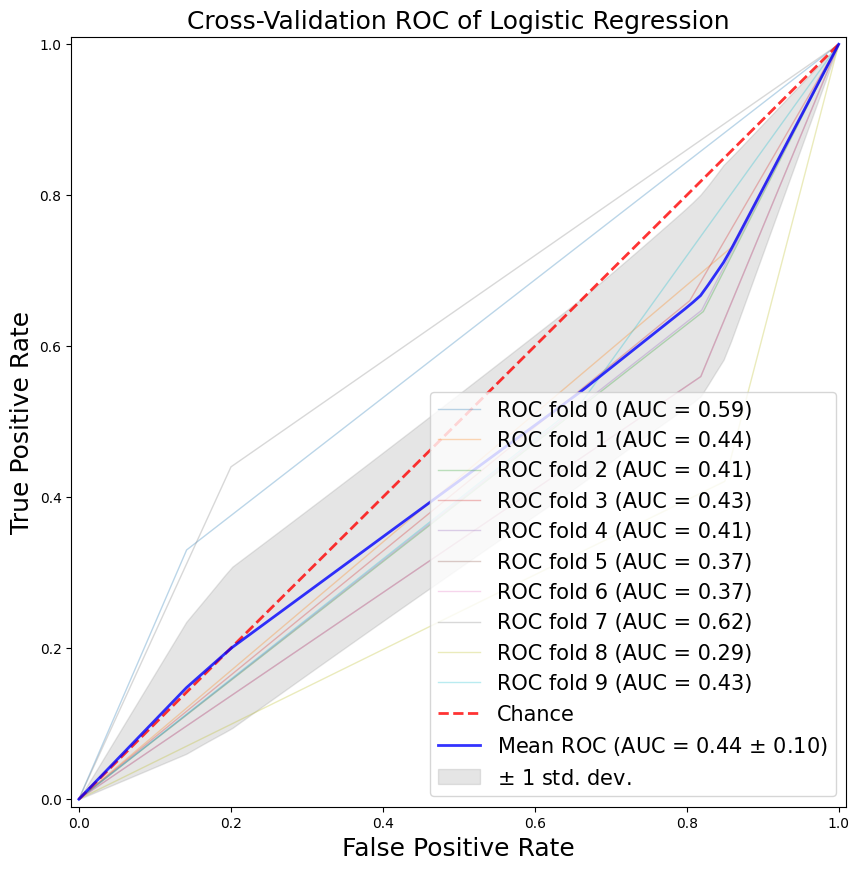

Average Accuracy: 0.3314833380573399
Average Precision: 0.0493451781488274
Average Recall: 0.552321713374345
Average F1 score: 0.086575793510732


In [110]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10)
classifier = LogisticRegressionCV(learningRate=0.01,tolerance=0.00005,lamda=0.5,maxIteration=5000)

tprs = []
aucs = []
accu=[]
prec=[]
recl=[]
f1sc=[]
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))
i = 0
for train_index, test_index  in cv.split(X_df.values, y_df.values):
    x_train_fold, x_test_fold = X_norm[train_index], X_norm[test_index]
    y_train_fold, y_test_fold = y_df.values[train_index], y_df.values[test_index]
    oversample = SMOTE(sampling_strategy=0.2)
    under = RandomUnderSampler(sampling_strategy=0.8)
    x_train_fold, y_train_fold = under.fit_resample(x_train_fold, y_train_fold)
    classifier.run_model(x_train_fold, y_train_fold)
    #x_test_fold=classifier.add_X0(x_test_fold)
    #probas_ = c.predict_proba(x_test_fold)
    c_pred= classifier.predict(x_test_fold)
    accu.append(accuracy_score(y_test_fold,c_pred))
    prec.append(sklearn.metrics.precision_score(y_test_fold,c_pred))
    recl.append(sklearn.metrics.recall_score(y_test_fold,c_pred))
    f1sc.append(sklearn.metrics.f1_score(y_test_fold,c_pred))
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test_fold, c_pred)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Logistic Regression',fontsize=18)
plt.legend(loc="lower right", prop={'size': 15})
plt.show()
avg_acc=0
avg_prec=0
avg_recl=0
avg_f1sc=0
for i,m,n,a in zip(accu,prec,recl,f1sc):
  avg_acc+=i
  avg_prec+=m
  avg_recl+=n
  avg_f1sc+=a
print('Average Accuracy:',avg_acc/10)
print('Average Precision:',avg_prec/10)
print('Average Recall:',avg_recl/10)
print('Average F1 score:',avg_f1sc/10)

# **Comparing With SKlearn Model**

In [111]:
x_train, x_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.3, random_state = 0)

In [112]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(x_train, y_train)

GaussianNB()

In [113]:
print("Naive Bayes score: ",gb.score(x_test, y_test))
y_pred=gb.predict(x_test)
print("F1 score:", sklearn.metrics.f1_score(y_test, y_pred))
print("Precision:", sklearn.metrics.precision_score(y_test, y_pred))
print("Recall:", sklearn.metrics.recall_score(y_test, y_pred))

Naive Bayes score:  0.9063123944094609
F1 score: 0.08819133034379671
Precision: 0.08356940509915015
Recall: 0.09335443037974683


In [114]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=5000)
l=logreg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [115]:
#logistic Regression
l_pred=l.predict(x_test)
print('Accuracy:',accuracy_score(y_test,l_pred))
print("Recall score : ", recall_score(y_test, l_pred))
print("Precision score : ",precision_score(y_test, l_pred ))
print("F1 score : ",f1_score(y_test, l_pred))

Accuracy: 0.9506988173859622
Recall score :  0.007911392405063292
Precision score :  0.25
F1 score :  0.015337423312883437
